# Week 4 Homework
    - math, matplotlib
    - arrays
    - functions
    - confusion matrices from scratch and classification
    - python visualizations with adjustments: hist, line, scatter
    

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [2]:
# Using arrays makes calculations much faster
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])

n = len(x)
mean = np.sum(x)/n
diff = x - mean
var = np.sum(diff**2)/(n-1)

print(f'Sample Mean:     {mean:<5.2f}')
print(f'Sample Variance: {var:<5.2f}')

Sample Mean:     16.60
Sample Variance: 25.60


In [3]:
# Using numpy built-ins makes coding much shorter
mean_np = np.mean(x)
var_np = np.var(x, ddof = 1)
print(f'Sample Mean:     {mean_np:<5.2f}')
print(f'Sample Variance: {var_np:<5.2f}')

Sample Mean:     16.60
Sample Variance: 25.60


## Problem 2: Scoring a Regression Model

In [4]:
def find_sse(true_y, pred_y):
    return np.sum((true_y - pred_y)**2) 
# return value could have been stored in a variable to return and I believe I once
# read that there are instances where this is preferable

In [5]:
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])

sse_1 = find_sse(true_y, pred_1)
sse_2 = find_sse(true_y, pred_2)

print(f'Model 1 SSE: {round(sse_1, 2):<5.2f}')
print(f'Model 2 SSE: {round(sse_2, 2):<5.2f}')

Model 1 SSE: 22.66
Model 2 SSE: 19.90


## Problem 3: Scoring a Classification Model

In [6]:
def find_accuracy(true_y, pred_y):
    accuracy = np.mean(true_y == pred_y)
    return accuracy     

In [7]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N',
                      'N', 'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N',
                      'N', 'N', 'P', 'N'])
print(f'{"Model Accuracy: "}{(find_accuracy(true_diag, pred_diag)):5.3f}')    

Model Accuracy: 0.750


In [8]:
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog',
                        'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog',
                        'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog',
                        'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog',
                        'cat', 'cat'])
print(f'{"Model Accuracy: "}{(find_accuracy(true_labels, pred_labels)):5.3f}') 

Model Accuracy: 0.875


## Problem 4: Classification Report

In [9]:
def classification_report(true_y, pred_y):
    classes = np.unique(true_y)
    negative_class = classes[0]
    positive_class = classes[1]
    accuracy = find_accuracy(true_y, pred_y)
    
    TP = np.count_nonzero((true_y == positive_class)[(pred_y == positive_class)] == True)    ### I found 'np.count_nonzero' online
        # original code below so you see my process. I combined them into one statement.  Same for TN,FP & FN.
        # TPa = (true_y == pos_class)
        # TPb = (pred_y == pos_class)
        # TP_accurate = TPa[TPb]
        # TP=np.count_nonzero(TP_accurate == True)
    TN = np.count_nonzero((true_y == negative_class)[(pred_y==negative_class)] == True)
    FP = np.count_nonzero((true_y == negative_class)[(pred_y == positive_class)] == True)
    FN = np.count_nonzero((pred_y==negative_class)[(true_y == positive_class)] == True)

    PP = TP / (TP + FP)
    PR = TP / (TP + FN)
    NP = TN / (TN + FN)
    NR = TN / (TN + FP)
    
    print(f'Positive Class:      {classes[1]}')
    print(f'Negative Class:      {classes[0]}')
    print(f'\nAccuracy:            {round(accuracy, 4):<0.4f}')
    print(f'Positive Precision:  {round(PP, 4):<0.4f}')
    print(f'Positive Recall:     {round(PR, 4):<0.4f}')
    print(f'Negative Precision:  {round(NP, 4):<0.4f}')
    print(f'Negative Recall:     {round(NR, 4):<0.4f}')

In [10]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'P', 'N'])
classification_report(true_diag, pred_diag)

Positive Class:      P
Negative Class:      N

Accuracy:            0.7500
Positive Precision:  0.5556
Positive Recall:     0.8333
Negative Precision:  0.9091
Negative Recall:     0.7143


In [11]:
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])
classification_report(true_labels, pred_labels)

Positive Class:      dog
Negative Class:      cat

Accuracy:            0.8750
Positive Precision:  0.8333
Positive Recall:     0.9091
Negative Precision:  0.9167
Negative Recall:     0.8462


## Problem 5: Transformation of Random Variables

In [12]:
np.random.seed(1)
X = np.random.normal(0, 0.4, 25000)
Y = np.e ** X
print(f'Sample Mean of X:    {round(np.mean(X), 4)}\nSample Std Dev of X: {round(np.std(X, ddof = 1), 4)}\nSample Mean of Y:    {round(np.mean(Y), 4)}     \nSample Std Dev of Y: {round(np.std(Y, ddof = 1), 4)}')    

Sample Mean of X:    0.0025
Sample Std Dev of X: 0.4002
Sample Mean of Y:    1.0862     
Sample Std Dev of Y: 0.4537


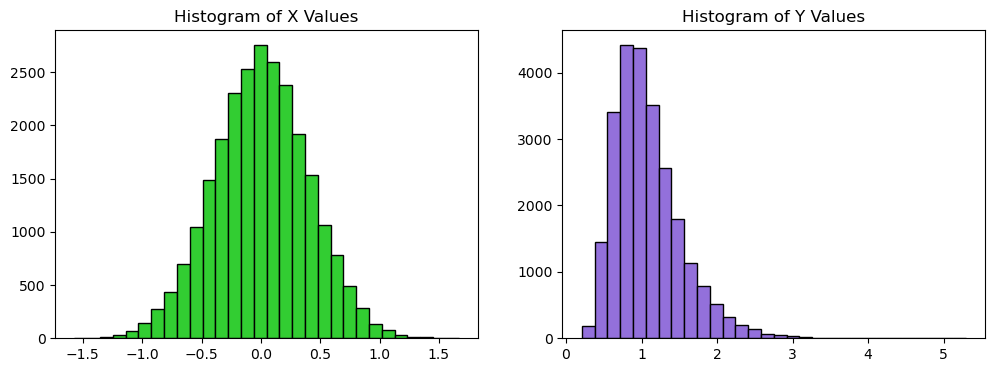

In [13]:
plt.figure(figsize = [12, 4])
plt.subplot(1, 2, 1)
plt.hist(X, edgecolor = 'black', color = 'limegreen', bins = 30)
plt.title('Histogram of X Values')

plt.subplot(1, 2, 2)
plt.hist(Y, edgecolor = 'black', color = 'mediumpurple', bins = 30)
plt.title('Histogram of Y Values')
plt.show()

In [14]:
print(f'Probability that Y is less than 0.5: {round(np.mean(np.where(Y < 0.5, 1, 0)), 4):<0.4f}')
print(f'Probability that Y is less than 1.0: {round(np.mean(np.where(Y < 1.0, 1, 0)), 4):<0.4f}')
print(f'Probability that Y is less than 2.0: {round(np.mean(np.where(Y < 2.0, 1, 0)), 4):<0.4f}')

Probability that Y is less than 0.5: 0.0410
Probability that Y is less than 1.0: 0.4969
Probability that Y is less than 2.0: 0.9574


## Problem 6: Stochastic Linear Relationships

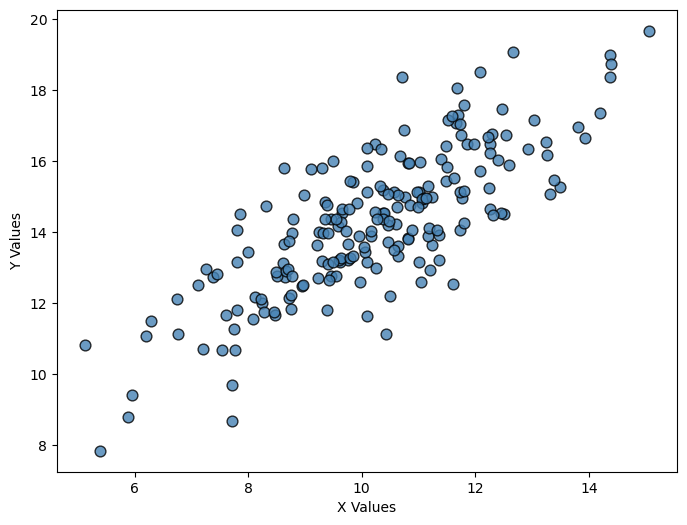

In [15]:
np.random.seed(1)
x_vals = np.random.normal(10, 2, 200)
errors = np.random.normal(0, 1.2, 200)
y_vals = 5.1 + 0.9 * x_vals + errors
# I am still confused about the conditions which require an array to be initialized by filling it with zeros
# some Canvas examples showed that.  This problem seems less confusing in that aspect since it's an equation.

plt.figure(figsize = [8,6])
plt.scatter(x_vals, y_vals, s = 60, color = 'steelblue', edgecolor = 'black', alpha = 0.8)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

In [16]:
diff_x = x_vals - np.mean(x_vals)
diff_y = y_vals - np.mean(y_vals)

# numerator = np.sum(diff_x * diff_y)
# denominator = (np.sum(diff_x**2) * np.sum(diff_y**2))**0.5
r = (np.sum(diff_x * diff_y)) / ((np.sum(diff_x**2) * np.sum(diff_y**2))**0.5)

print(f'Correlation between X and Y: {round(r, 4):<0.4f}')

Correlation between X and Y: 0.7861


## Problem 7: Relationship between Life Expectancy and Per Capita GDP

In [17]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t')
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [18]:
continent_list = ['africa', 'americas', 'asia', 'europe'] 
color_list = ['chartreuse', 'mediumpurple', 'teal', 'goldenrod']

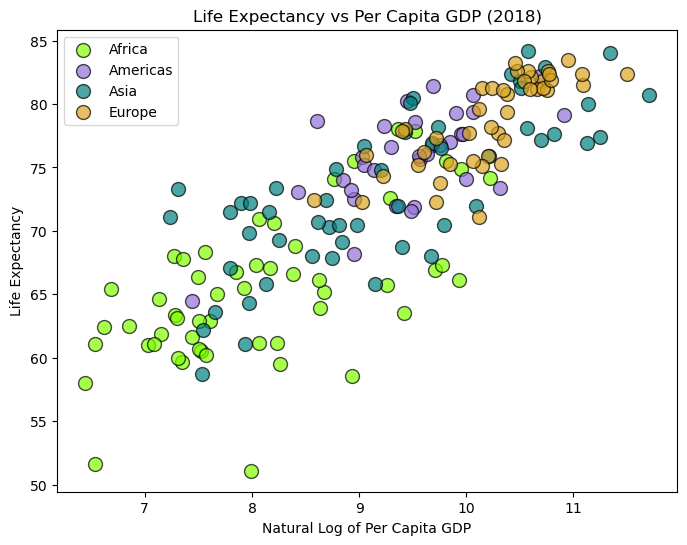

In [19]:
fig, ax = plt.subplots(figsize = (8, 6))

for i in range(len(continent_list)):
    sel = (continent == continent_list[i]) & (year == 2018)
    ax.scatter(np.log(pcgdp[sel]), life_exp[sel], s = 100, c = color_list[i], alpha = 0.7, edgecolors = 'black', label = (continent_list[i]).title())

ax.set_xlabel('Natural Log of Per Capita GDP')
ax.set_ylabel('Life Expectancy')
ax.set_title('Life Expectancy vs Per Capita GDP (2018)')
ax.legend()
plt.show()

In [21]:
#### fig, axs = plt.subplots(2, 2, figsize = (10, 8))

for i in range(len(continent_list)):
    sel = (continent == continent_list[i]) & (year == 2018)

    # I could have used another loop here but I decided to use modulo and floor functions
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    ax.scatter(np.log(pcgdp[sel]), life_exp[sel], s = 100, c = color_list[i], alpha = 0.7, edgecolors = 'black')
    ax.set_xlim([6, 12])
    ax.set_ylim([45, 90])
    
    # "Remove the label from each scatter plot..."  I hope I understood this correctly
    # ax.set_xlabel('Natural Log of Per Capita GDP')
    # ax.set_ylabel('Life Expectancy')
    ax.set_title(continent_list[i].title())

plt.tight_layout() 
plt.show()

NameError: name 'axs' is not defined

## Problem 8: Trends by Country

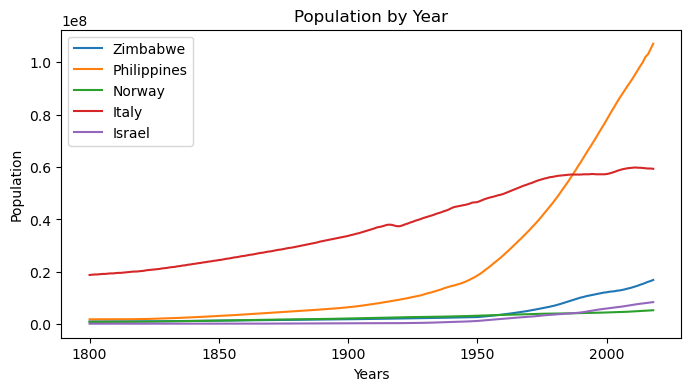

In [22]:
selected_countries = ['Zimbabwe', 'Philippines', 'Norway', 'Italy', 'Israel']

plt.figure(figsize = (8, 4))

for country_name in selected_countries:
    years = []
    populations = []
    
    for i in range(len(country)):
        if country[i] == country_name:
            years.append(year[i])
            populations.append(population[i])
    
    plt.plot(years, populations, label = country_name)

plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population by Year')
plt.legend()
plt.show()

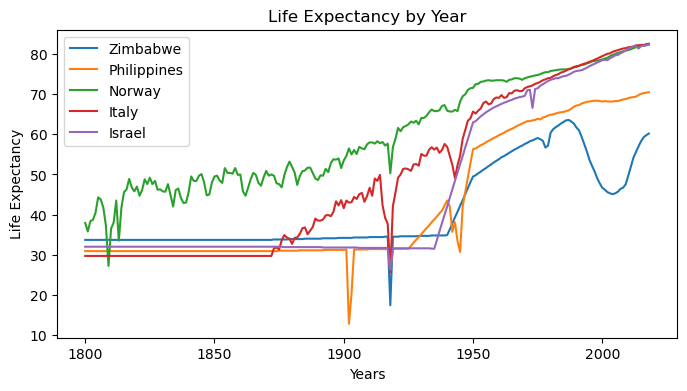

In [23]:
selected_countries = ['Zimbabwe', 'Philippines', 'Norway', 'Italy', 'Israel']

plt.figure(figsize = (8, 4))

for country_name in selected_countries:
    years = []
    life_expectancy = []
    
    for i in range(len(country)):
        if country[i] == country_name:
            years.append(year[i])
            life_expectancy.append(life_exp[i])
    
    plt.plot(years, life_expectancy, label = country_name)

plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')
plt.legend()
plt.show()